In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spreadsheet = pd.read_csv('C:/Users/Alex/Downloads/Kevin_Stock_List.csv')
tickers = spreadsheet["Ticker"]
arr = tickers.values
arr = np.resize(arr, 11)
arr

array(['GOOGL'], dtype=object)

In [4]:
# Import data
df = data.DataReader(arr, 'yahoo', start='2010/01/01', end='2013/01/01')
df.head()

AttributeError: 'numpy.ndarray' object has no attribute 'replace'

In [4]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,GOOGL,KLBAY,AFL,PSON.L,TU,AAL,BA,CAT,F,GM,PEP
Date,,,,,,,,,,,
2010-01-04,15.684434,NaN,17.242176,550.830505,4.643703,4.496877,43.777546,41.353195,6.714717,NaN,42.175018
2010-01-05,15.615365,NaN,17.742367,546.206970,4.645172,5.005956,45.211357,41.847591,7.158880,NaN,42.684639
2010-01-06,15.221722,NaN,17.898222,538.192505,4.615847,4.798554,46.582802,41.974728,7.426687,NaN,42.257656
2010-01-07,14.867367,NaN,18.090324,536.034851,4.592386,4.939966,48.468552,42.144230,7.616109,NaN,41.989071
2010-01-08,15.065566,NaN,17.909100,532.027710,4.662766,4.845690,48.001015,42.617447,7.635707,NaN,41.851337


In [5]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,GOOGL,KLBAY,AFL,PSON.L,TU,AAL,BA,CAT,F,GM,PEP
Symbols,,,,,,,,,,,
GOOGL,0.000279,0.000072,0.000185,0.000064,0.000081,0.000148,0.000136,0.000171,0.000160,0.000148,0.000050
KLBAY,0.000072,0.000583,0.000142,0.000055,0.000062,0.000151,0.000109,0.000140,0.000123,0.000081,0.000037
AFL,0.000185,0.000142,0.000455,0.000117,0.000130,0.000310,0.000244,0.000288,0.000302,0.000279,0.000104
PSON.L,0.000064,0.000055,0.000117,0.000175,0.000042,0.000071,0.000090,0.000102,0.000098,0.000092,0.000034
TU,0.000081,0.000062,0.000130,0.000042,0.000146,0.000117,0.000096,0.000128,0.000114,0.000101,0.000044
AAL,0.000148,0.000151,0.000310,0.000071,0.000117,0.001405,0.000241,0.000285,0.000337,0.000289,0.000097
BA,0.000136,0.000109,0.000244,0.000090,0.000096,0.000241,0.000279,0.000222,0.000215,0.000192,0.000071
CAT,0.000171,0.000140,0.000288,0.000102,0.000128,0.000285,0.000222,0.000399,0.000280,0.000275,0.000080
F,0.000160,0.000123,0.000302,0.000098,0.000114,0.000337,0.000215,0.000280,0.000478,0.000344,0.000076


In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,GOOGL,KLBAY,AFL,PSON.L,TU,AAL,BA,CAT,F,GM,PEP
Symbols,,,,,,,,,,,
GOOGL,1.000000,0.178435,0.518843,0.288658,0.402128,0.236021,0.487738,0.511497,0.438865,0.403331,0.330331
KLBAY,0.178435,1.000000,0.268280,0.168325,0.210266,0.166546,0.271114,0.289244,0.237258,0.156545,0.169143
AFL,0.518843,0.268280,1.000000,0.416354,0.505578,0.387863,0.685208,0.676151,0.648014,0.594775,0.541072
PSON.L,0.288658,0.168325,0.416354,1.000000,0.260274,0.142974,0.407298,0.385269,0.340031,0.312208,0.286219
TU,0.402128,0.210266,0.505578,0.260274,1.000000,0.258030,0.473946,0.528388,0.432371,0.391777,0.402013
AAL,0.236021,0.166546,0.387863,0.142974,0.258030,1.000000,0.384928,0.381192,0.410862,0.343594,0.287820
BA,0.487738,0.271114,0.685208,0.407298,0.473946,0.384928,1.000000,0.666155,0.588793,0.547255,0.472243
CAT,0.511497,0.289244,0.676151,0.385269,0.528388,0.381192,0.666155,1.000000,0.641885,0.616353,0.443063
F,0.438865,0.237258,0.648014,0.340031,0.432371,0.410862,0.588793,0.641885,1.000000,0.743108,0.386327


In [7]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
GOOGL     0.264311
KLBAY     0.381829
AFL       0.337196
PSON.L    0.209155
TU        0.191110
AAL       0.592651
BA        0.263873
CAT       0.315731
F         0.345756
GM        0.358262
PEP       0.142149
dtype: float64

In [8]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
GOOGL     0.060871
KLBAY     0.265868
AFL       0.016945
PSON.L    0.092051
TU        0.183771
AAL       0.389738
BA        0.067883
CAT       0.000475
F        -0.044379
GM       -0.009261
PEP       0.037190
dtype: float64

SyntaxError: invalid syntax (2755973866.py, line 2)

In [9]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
GOOGL,0.060871,0.264311
KLBAY,0.265868,0.381829
AFL,0.016945,0.337196
PSON.L,0.092051,0.209155
TU,0.183771,0.191110
AAL,0.389738,0.592651
BA,0.067883,0.263873
CAT,0.000475,0.315731
F,-0.044379,0.345756


In [10]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 300


In [11]:
while len(p_ret) < num_portfolios:
    while True:
        weights = np.random.random(num_assets)
        weights = weights/np.sum(weights)
        returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                          # weights
        var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
        sd = np.sqrt(var) # Daily standard deviation
        ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
        valid = True
        for (r, v) in zip(p_ret, p_vol):
            if (returns + 0.01 < r) and (ann_sd - 0.01 > v):
                valid = False
                break
        if valid == True:
            for i in range(len(p_ret) - 1, -1, -1):
                if (returns > p_ret[i] + 0.01) and (ann_sd < p_vol[i] - 0.01):
                    p_ret.pop(i)
                    p_vol.pop(i)
                    p_weights.pop(i)
            p_weights.append(weights)
            p_ret.append(returns)
            p_vol.append(ann_sd)
            break

In [12]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [13]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,GOOGL weight,KLBAY weight,AFL weight,PSON.L weight,TU weight,AAL weight,BA weight,CAT weight,F weight,GM weight,PEP weight
0,0.096809,0.173016,0.164940,0.095366,0.086089,0.190777,0.141623,0.024166,0.061477,0.033419,0.016203,0.073969,0.111970
1,0.166246,0.221492,0.009724,0.177637,0.009046,0.047412,0.202641,0.170326,0.185930,0.065057,0.087282,0.003532,0.041413
2,0.106370,0.157807,0.016260,0.005980,0.012656,0.217600,0.238947,0.071559,0.058778,0.032893,0.031936,0.053794,0.259597
3,0.101510,0.172067,0.229781,0.117777,0.034153,0.204740,0.023462,0.061752,0.036088,0.059713,0.023473,0.017353,0.191709
4,0.170896,0.217121,0.017749,0.194984,0.037388,0.150607,0.189143,0.173981,0.018875,0.082959,0.000670,0.115141,0.018504


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

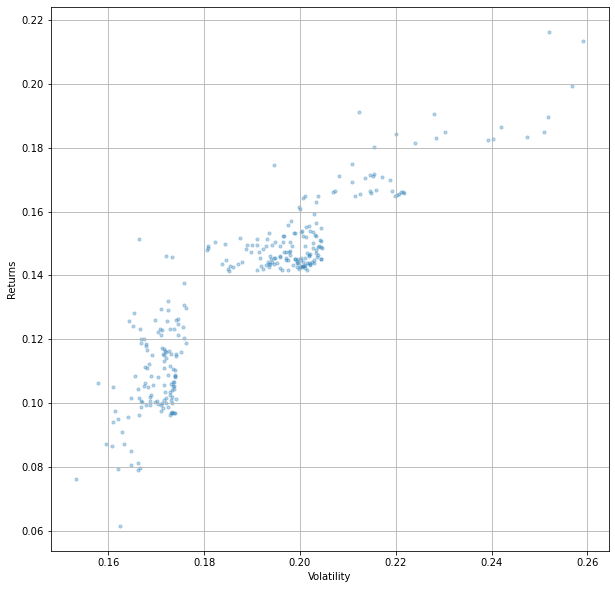

In [14]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


In [15]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns          0.076368
Volatility       0.153264
GOOGL weight     0.097991
KLBAY weight     0.083024
AFL weight       0.006793
PSON.L weight    0.225315
TU weight        0.093551
AAL weight       0.013741
BA weight        0.005432
CAT weight       0.002856
F weight         0.156652
GM weight        0.004167
PEP weight       0.310477
Name: 132, dtype: float64

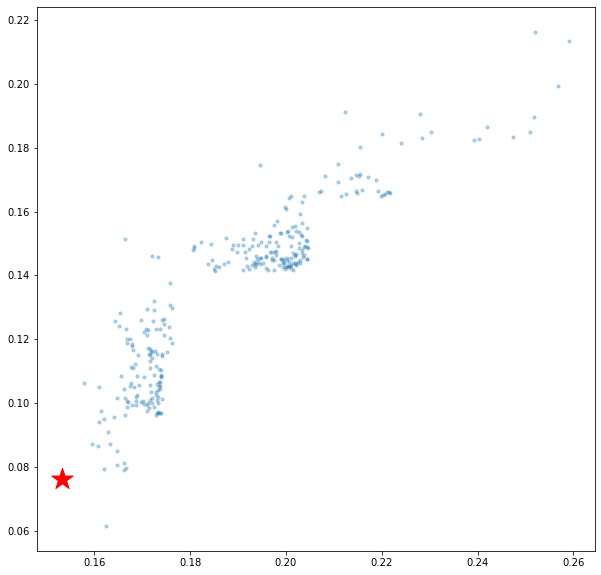

In [16]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [17]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns          0.191295
Volatility       0.212266
GOOGL weight     0.034896
KLBAY weight     0.247019
AFL weight       0.041044
PSON.L weight    0.145407
TU weight        0.184947
AAL weight       0.186510
BA weight        0.015378
CAT weight       0.022646
F weight         0.033148
GM weight        0.003355
PEP weight       0.085649
Name: 249, dtype: float64

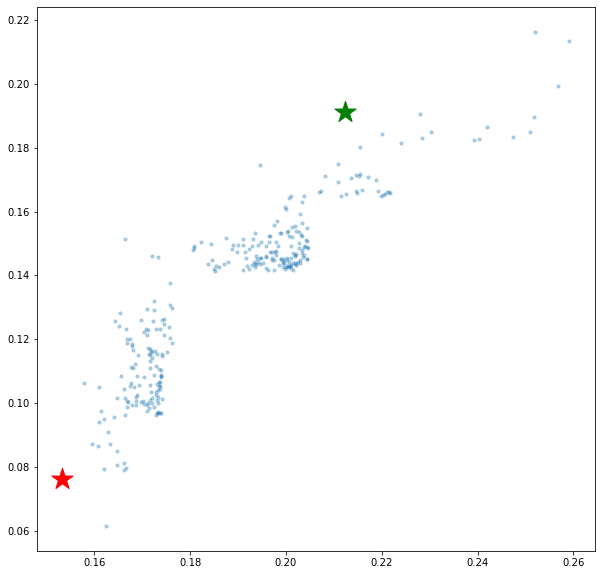

In [18]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [23]:
sec_min_vol_port = portfolios.iloc[portfolios['Volatility'].nsmallest(2)]
# idxmin() gives us the minimum value in the column specified.                               
sec_min_vol_port

,Returns,Volatility,GOOGL weight,KLBAY weight,AFL weight,PSON.L weight,TU weight,AAL weight,BA weight,CAT weight,F weight,GM weight,PEP weight
0,0.096809,0.173016,0.16494,0.095366,0.086089,0.190777,0.141623,0.024166,0.061477,0.033419,0.016203,0.073969,0.11197
0,0.096809,0.173016,0.16494,0.095366,0.086089,0.190777,0.141623,0.024166,0.061477,0.033419,0.016203,0.073969,0.11197
